In [51]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import random
import time
from collections import OrderedDict
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [52]:
def generar_datos_accesos(num_accesos=10000, num_paginas=50):
    data = []
    historial_accesos = {}
    conteo_frecuencias = {pagina: 0 for pagina in range(num_paginas)}

    for acceso_id in range(num_accesos):
        pagina_actual = random.randint(0, num_paginas - 1)
        tiempo_actual = int(time.time() * 1000)
        
        
        tiempo_desde_ultimo_acceso = random.randint(0, 1000) 

        conteo_frecuencias[pagina_actual] += 1 
        frecuencia_uso = conteo_frecuencias[pagina_actual]

        data.append([acceso_id, pagina_actual, frecuencia_uso, tiempo_desde_ultimo_acceso])

        
        historial_accesos[pagina_actual] = tiempo_actual

    
    columnas = ["acceso_id", "pagina_actual", "frecuencia_uso", "tiempo_desde_ultimo_acceso"]
    df_accesos = pd.DataFrame(data, columns=columnas)

    df_accesos['reemplazo'] = np.random.choice([0, 1], size=len(df_accesos))

    return df_accesos


dataset_accesos = generar_datos_accesos()


print("Primeras filas del dataset generado:")
print(dataset_accesos.head())

dataset_accesos.to_csv("dataset_accesos.csv", index=False)


Primeras filas del dataset generado:
   acceso_id  pagina_actual  frecuencia_uso  tiempo_desde_ultimo_acceso  \
0          0              2               1                         800   
1          1             12               1                         969   
2          2             45               1                         923   
3          3             22               1                         402   
4          4             19               1                         361   

   reemplazo  
0          0  
1          1  
2          1  
3          0  
4          0  


In [53]:

X = dataset_accesos[['frecuencia_uso', 'tiempo_desde_ultimo_acceso']]
y = dataset_accesos['reemplazo'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

modelo_rf = RandomForestClassifier(n_estimators=100, random_state=42)

modelo_rf.fit(X_train, y_train)

y_pred = modelo_rf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"\nPrecisión del modelo: {accuracy:.2f}")
print("\nReporte de clasificación:\n", classification_report(y_test, y_pred))
print("\nMatriz de confusión:\n", confusion_matrix(y_test, y_pred))

nuevas_caracteristicas = pd.DataFrame([[5, 10.2]], columns=['frecuencia_uso', 'tiempo_desde_ultimo_acceso'])
prediccion = modelo_rf.predict(nuevas_caracteristicas)
print("\nPredicción para las nuevas características (frecuencia de uso=5, tiempo desde el último acceso=10.2):", prediccion[0])



Precisión del modelo: 0.51

Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.50      0.52      0.51       979
           1       0.52      0.50      0.51      1021

    accuracy                           0.51      2000
   macro avg       0.51      0.51      0.51      2000
weighted avg       0.51      0.51      0.51      2000


Matriz de confusión:
 [[509 470]
 [510 511]]

Predicción para las nuevas características (frecuencia de uso=5, tiempo desde el último acceso=10.2): 1


In [54]:
def fifo_replacement(paginas, num_marcos):
    marcos = []
    fallos = 0

    for pagina in paginas:
        if pagina not in marcos:
            if len(marcos) < num_marcos:
                marcos.append(pagina) 
            else:
                marcos.pop(0)  
                marcos.append(pagina)  
            fallos += 1

    return fallos


In [55]:
from collections import OrderedDict

def lru_replacement(paginas, num_marcos):
    marcos = OrderedDict()
    fallos = 0

    for pagina in paginas:
        if pagina not in marcos:
            if len(marcos) >= num_marcos:
                marcos.popitem(last=False) 
            marcos[pagina] = None  
            fallos += 1 
        else:
            marcos.move_to_end(pagina)
    return fallos


In [ ]:
paginas_acceso = dataset_accesos['pagina_actual'].tolist()
num_marcos = 5

fallos_fifo = fifo_replacement(paginas_acceso, num_marcos)
fallos_lru = lru_replacement(paginas_acceso, num_marcos)

predicciones = modelo_rf.predict(dataset_accesos[['frecuencia_uso', 'tiempo_desde_ultimo_acceso']])
fallos_ml = sum(predicciones)

print("\nResultados de comparación:")
print(f"Fallos de página (FIFO): {fallos_fifo}")
print(f"Fallos de página (LRU): {fallos_lru}")
print(f"Fallos de página (Modelo ML): {fallos_ml}")


Resultados de comparación:
Fallos de página (FIFO): 9068
Fallos de página (LRU): 9068
Fallos de página (Modelo ML): 4959


C:\Users\Usuario-PC\AppData\Local\Temp\ipykernel_14144\1070553537.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Algoritmo', y='Fallos de Página', data=resultados, palette='Blues_d')


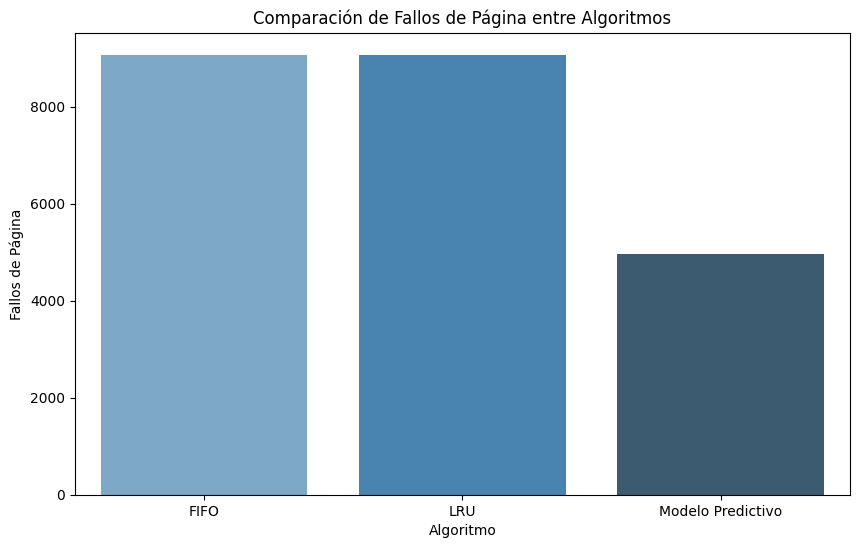

In [ ]:
resultados = pd.DataFrame({
    'Algoritmo': ['FIFO', 'LRU', 'Modelo Predictivo'],
    'Fallos de Página': [fallos_fifo, fallos_lru, fallos_ml],
    'Precisión Modelo': [None, None, accuracy] 
})

plt.figure(figsize=(10, 6))
sns.barplot(x='Algoritmo', y='Fallos de Página', data=resultados, palette='Blues_d')
plt.title('Comparación de Fallos de Página entre Algoritmos')
plt.ylabel('Fallos de Página')
plt.xlabel('Algoritmo')
plt.show()

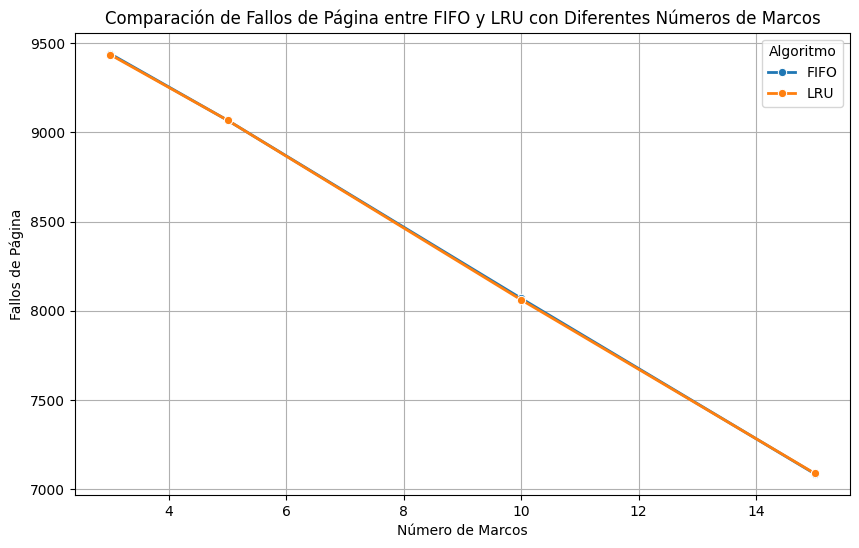

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

numeros_marcos = [3, 5, 10, 15]

def calcular_fallos_con_diferentes_marcos(paginas_acceso, numeros_marcos):
    fallos_fifo = []
    fallos_lru = []
    
    for marcos in numeros_marcos:
        fallos_fifo.append(fifo_replacement(paginas_acceso, marcos))
        fallos_lru.append(lru_replacement(paginas_acceso, marcos))
    
    return fallos_fifo, fallos_lru

fallos_fifo, fallos_lru = calcular_fallos_con_diferentes_marcos(paginas_acceso, numeros_marcos)

df_comparacion = pd.DataFrame({
    'Numero de Marcos': numeros_marcos * 2,
    'Fallos de Página': fallos_fifo + fallos_lru,
    'Algoritmo': ['FIFO'] * len(numeros_marcos) + ['LRU'] * len(numeros_marcos)
})

plt.figure(figsize=(10, 6))
sns.lineplot(data=df_comparacion, x='Numero de Marcos', y='Fallos de Página', hue='Algoritmo', marker='o', linewidth=2)

plt.title('Comparación de Fallos de Página entre FIFO y LRU con Diferentes Números de Marcos')
plt.xlabel('Número de Marcos')
plt.ylabel('Fallos de Página')
plt.legend(title='Algoritmo')
plt.grid(True)
plt.show()
